In [1]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2277

In [2]:
#載入資料、確認資料
df = pd.read_csv('stockData/stockData.csv', parse_dates=[1])
column = ['指數代碼', '日期', '開盤價', '最高價', '最低價', '收盤價', '調整後收盤價', '交易量']
df.columns = column

display(df.head())
display(df.tail())

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
0,NYA,1965-12-31,528.6900,528.6900,528.6900,528.6900,528.6900,0.0000
1,NYA,1966-01-03,527.2100,527.2100,527.2100,527.2100,527.2100,0.0000
2,NYA,1966-01-04,527.8400,527.8400,527.8400,527.8400,527.8400,0.0000
3,NYA,1966-01-05,531.1200,531.1200,531.1200,531.1200,531.1200,0.0000
4,NYA,1966-01-06,532.0700,532.0700,532.0700,532.0700,532.0700,0.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
112452,N100,2021-05-27,1241.1200,1251.9100,1241.1200,1247.0699,1247.0699,379696400.0000
112453,N100,2021-05-28,1249.4700,1259.2100,1249.0300,1256.6000,1256.6000,160773400.0000
112454,N100,2021-05-31,1256.0800,1258.8800,1248.1400,1248.9301,1248.9301,91173700.0000
112455,N100,2021-06-01,1254.6100,1265.6600,1254.6100,1258.5800,1258.5800,155179900.0000
112456,N100,2021-06-02,1258.4900,1263.7100,1258.2400,1263.6200,1263.6200,148465000.0000


In [ ]:
# 確認遺失值、欲處理資料
missing_rows = df[df.isnull().any(axis=1)]
# 查看有遺失值的列(最後5列)
display(missing_rows.tail())
# 向前填充遺失值，同df.fillnu(method='ffill')
df_filled = df.ffill()
#df_filled.isnull().sum()

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
108316,N100,2005-03-28,NaN,NaN,NaN,NaN,NaN,NaN
108511,N100,2005-12-26,NaN,NaN,NaN,NaN,NaN,NaN
110051,N100,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
110643,N100,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN
112090,N100,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN


指數代碼         0
日期           0
開盤價       2204
最高價       2204
最低價       2204
收盤價       2204
調整後收盤價    2204
交易量       2204
dtype: int64

In [9]:
df_ixic = df_filled[df_filled['指數代碼'] == 'IXIC']

display(df_ixic.head())
display(df_ixic.tail())

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
13948,IXIC,1971-02-05,100.0000,100.0000,100.0000,100.0000,100.0000,0.0000
13949,IXIC,1971-02-08,100.8400,100.8400,100.8400,100.8400,100.8400,0.0000
13950,IXIC,1971-02-09,100.7600,100.7600,100.7600,100.7600,100.7600,0.0000
13951,IXIC,1971-02-10,100.6900,100.6900,100.6900,100.6900,100.6900,0.0000
13952,IXIC,1971-02-11,101.4500,101.4500,101.4500,101.4500,101.4500,0.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
26633,IXIC,2021-05-24,13557.2100,13708.8496,13551.0098,13661.1699,13661.1699,3490650000.0000
26634,IXIC,2021-05-25,13721.5400,13751.1396,13631.7998,13657.1699,13657.1699,4084480000.0000
26635,IXIC,2021-05-26,13693.9404,13750.1602,13679.5898,13738.0000,13738.0000,4231140000.0000
26636,IXIC,2021-05-27,13742.5898,13776.5195,13701.6299,13736.2803,13736.2803,5057550000.0000
26637,IXIC,2021-05-28,13792.0498,13820.8701,13747.6104,13748.7402,13748.7402,4435220000.0000


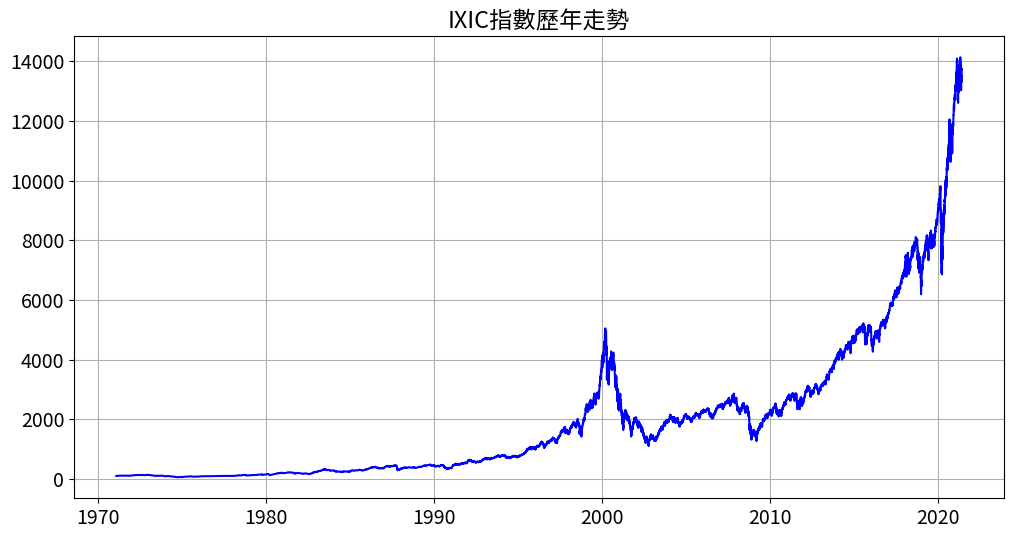

In [13]:
#繪製時間序列資料圖，因為要預測時間的[調整後收盤價]
plt.figure(figsize=(12,6))
plt.plot(df_ixic['日期'], df_ixic['調整後收盤價'], color='b')
plt.title('IXIC指數歷年走勢')

plt.grid() #顯示網格
plt.show()

In [ ]:
x = df_ixic.drop(['日期', '收盤價','調整後收盤價'], axis=1)
y = df_ixic['調整後收盤價'].values

In [15]:
# 分割(訓練train、驗證validation、測試test)
# 日期分割
train_end_date = pd.to_datetime('2005-12-31')
validation_end_date = pd.to_datetime('2015-12-31')

# 把2005-12-31(含)前的資料指派給train_df2
train_df_ixic = df_ixic[df_ixic['日期'] <= train_end_date]
# 把2015-12-31(含)前的資料指派給validation_df2
validation_df_ixic = df_ixic[(df_ixic['日期'] <= validation_end_date) & (df_ixic['日期'] > train_end_date)] #注意pd中的and要用'&'代替，且是優先運算因子
# 把2015-12-31(不含)後的資料指派給test_df2
test_df_ixic = df_ixic[df_ixic['日期'] > validation_end_date]

display(train_df_ixic.tail())
display(validation_df_ixic.head())
display(validation_df_ixic.tail())
display(test_df_ixic.head())
print("資料切分和 Prophet 資料準備完成。")

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
22755,IXIC,2005-12-23,2249.4099,2254.7100,2245.5801,2249.4199,2249.4199,978370000.0000
22756,IXIC,2005-12-27,2253.0500,2259.6799,2226.6201,2226.8899,2226.8899,1250500000.0000
22757,IXIC,2005-12-28,2230.3601,2233.5400,2221.4099,2228.9399,2228.9399,1221540000.0000
22758,IXIC,2005-12-29,2229.6001,2232.8899,2216.9800,2218.1599,2218.1599,1185350000.0000
22759,IXIC,2005-12-30,2209.0300,2209.9700,2200.5100,2205.3201,2205.3201,1284050000.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
22760,IXIC,2006-01-03,2216.5300,2249.6799,2189.9099,2243.7400,2243.7400,1998300000.0000
22761,IXIC,2006-01-04,2246.9600,2265.2800,2246.0701,2263.4600,2263.4600,1887560000.0000
22762,IXIC,2006-01-05,2264.9299,2277.5601,2264.5000,2276.8701,2276.8701,1891750000.0000
22763,IXIC,2006-01-06,2289.2100,2306.7200,2281.0100,2305.6201,2305.6201,2233640000.0000
22764,IXIC,2006-01-09,2306.1799,2322.6299,2303.1299,2318.6899,2318.6899,1949140000.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
25272,IXIC,2015-12-24,5046.1899,5063.2798,5043.6499,5048.4902,5048.4902,706880000.0000
25273,IXIC,2015-12-28,5032.2900,5041.2700,4999.0698,5040.9902,5040.9902,1310650000.0000
25274,IXIC,2015-12-29,5066.5200,5116.9902,5065.8901,5107.9399,5107.9399,1383470000.0000
25275,IXIC,2015-12-30,5101.1802,5102.3501,5065.6802,5065.8501,5065.8501,1247530000.0000
25276,IXIC,2015-12-31,5047.0400,5058.0601,5007.0098,5007.4102,5007.4102,1437480000.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
25277,IXIC,2016-01-04,4897.6499,4903.0898,4846.9800,4903.0898,4903.0898,2218420000.0000
25278,IXIC,2016-01-05,4917.8398,4926.7300,4872.7402,4891.4302,4891.4302,1927380000.0000
25279,IXIC,2016-01-06,4813.7598,4866.0400,4804.6899,4835.7598,4835.7598,2168620000.0000
25280,IXIC,2016-01-07,4736.3999,4788.0200,4688.1699,4689.4302,4689.4302,2552590000.0000
25281,IXIC,2016-01-08,4722.0200,4742.5698,4637.8501,4643.6299,4643.6299,2288750000.0000


資料切分和 Prophet 資料準備完成。


In [16]:
#選擇演算法
#因為演算法很多，直接用XGBoost分類演算法的回歸版本，在回歸演算法中以效果優良著稱
from xgboost import XGBRegressor

#objective:squarederror是使用MSE均方誤差解決回歸問題,回歸問題中通常會用MSE當作損失函數。分類問題通常交叉熵(Cross entropy)當作損失函數
algorithm = XGBRegressor(objective ='reg:squarederror', random_state=random_seed)

In [17]:
#訓練
algorithm.fit(train_df_ixic)

#預測
prad_ixic = algorithm.predict(validation_df_ixic)

print(prad_ixic[:5])

TypeError: XGBModel.fit() missing 1 required positional argument: 'y'